In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [8]:
df = pd.read_csv('wandb/personality_crop_connected.csv')

In [10]:
print(df.shape)
df.sample(5)

(183, 32)


,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_norm,batch_size,...,train_loss_ope_epoch,trainer/global_step,val_acc_epoch,val_loss_agr_epoch,val_loss_all_epoch,val_loss_con_epoch,val_loss_epoch,val_loss_ext_epoch,val_loss_neu_epoch,val_loss_ope_epoch
64,effortless-sweep-19,finished,-,krl1,NaN,2022-05-17T00:52:20.000Z,887,i7gw1rsy,False,64,...,0.529280,18949,0.583118,0.640457,NaN,0.654301,0.651200,0.683337,0.695546,0.582357
17,clean-sweep-9,finished,-,krl1,NaN,2022-05-17T21:17:05.000Z,560,571g8acr,False,8,...,0.225403,21174,0.625245,0.836093,NaN,0.882075,0.908209,0.972702,0.967200,0.882978
11,icy-sweep-5,finished,-,krl1,NaN,2022-05-18T07:52:00.000Z,1128,24iuibm9,False,2,...,0.272513,48399,0.621571,0.741315,NaN,0.770286,0.775083,0.802198,0.812572,0.749047
135,woven-sweep-48,finished,-,krl1,NaN,2022-05-16T13:23:43.000Z,1647,cnyxbmta,True,128,...,0.596783,9499,0.425814,0.741588,NaN,0.640821,0.679345,0.663345,0.674143,0.676829
159,pious-sweep-24,finished,-,krl1,NaN,2022-05-16T05:16:19.000Z,696,cnyxbmta,True,128,...,0.292732,3989,0.526830,0.646629,NaN,0.649099,0.649984,0.656967,0.683253,0.613972


In [36]:
column = 'batch_size'
df_tmp = df.groupby(column, as_index=False) \
    .agg({'val_acc_epoch': 'mean'})
df_tmp.columns = [column, 'mean_value']
df_tmp.sort_values(by=column, ascending=True, inplace=True)
df_tmp.head(30)

,batch_size,mean_value
0,2,0.617189
1,4,0.616121
2,8,0.605390
3,16,0.598235
4,32,0.594281
5,64,0.591575
6,128,0.526388
7,256,0.587503


In [40]:
df[df.batch_size==128].val_acc_epoch.max()

0.5978276133537292

Text(0.5, 1.0, 'Dokładność zbioru walidacyjnego a rozmiar batcha')

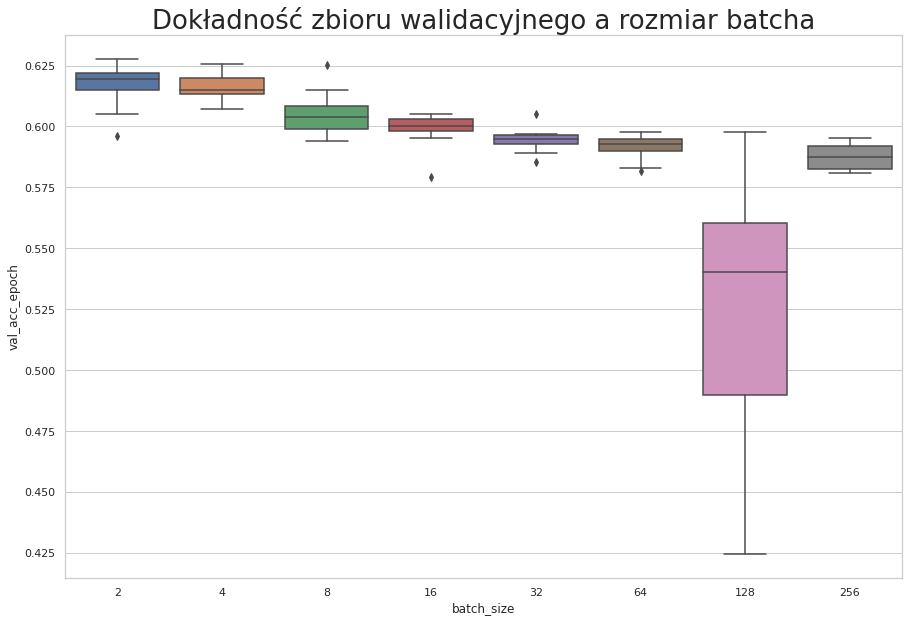

In [71]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="batch_size", y="val_acc_epoch", data=df)
plt.title('Dokładność zbioru walidacyjnego a rozmiar batcha', fontdict={'fontsize':26})

Text(0.5, 1.0, 'Dokładność zbioru walidacyjnego a rozmiar batcha')

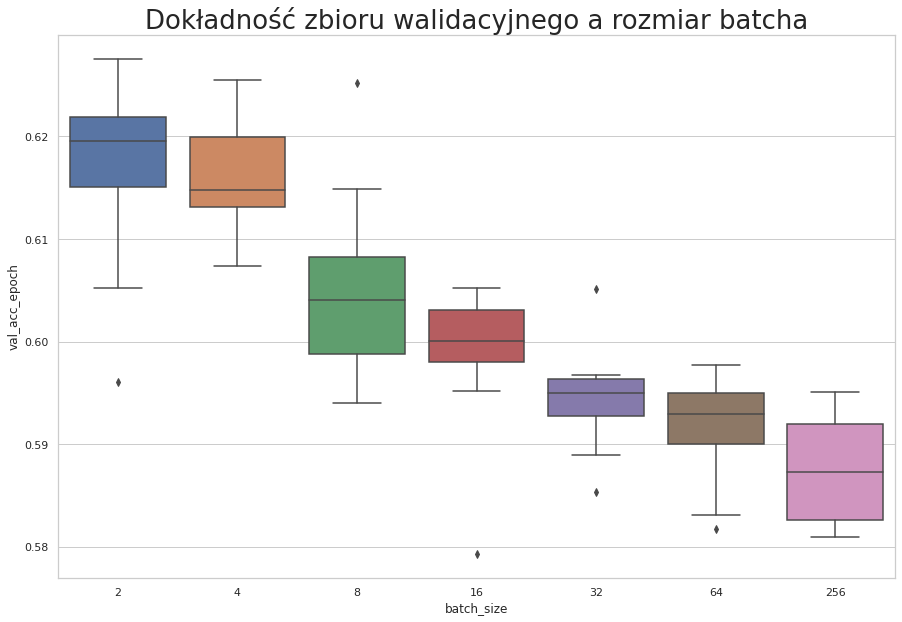

In [72]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="batch_size", y="val_acc_epoch", data=df[df.batch_size!=128])
plt.title('Dokładność zbioru walidacyjnego a rozmiar batcha', fontdict={'fontsize':26})

Text(0.5, 1.0, 'Dokładność zbioru walidacyjnego a zastosowanie batch normalization')

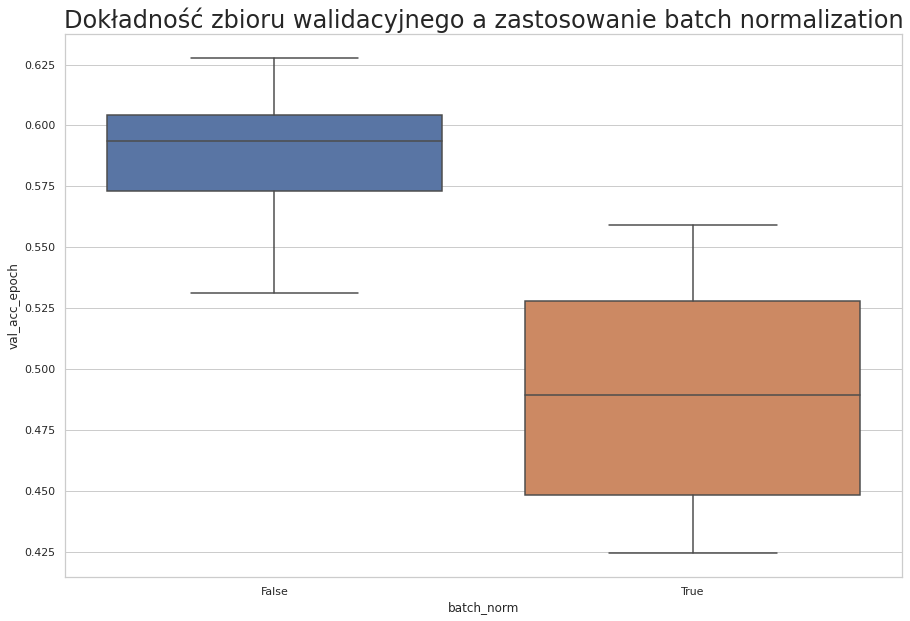

In [74]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="batch_norm", y="val_acc_epoch", data=df)
plt.title('Dokładność zbioru walidacyjnego a zastosowanie batch normalization', fontdict={'fontsize':24})

Text(0.5, 1.0, 'Dokładność zbioru walidacyjnego a learning rate')

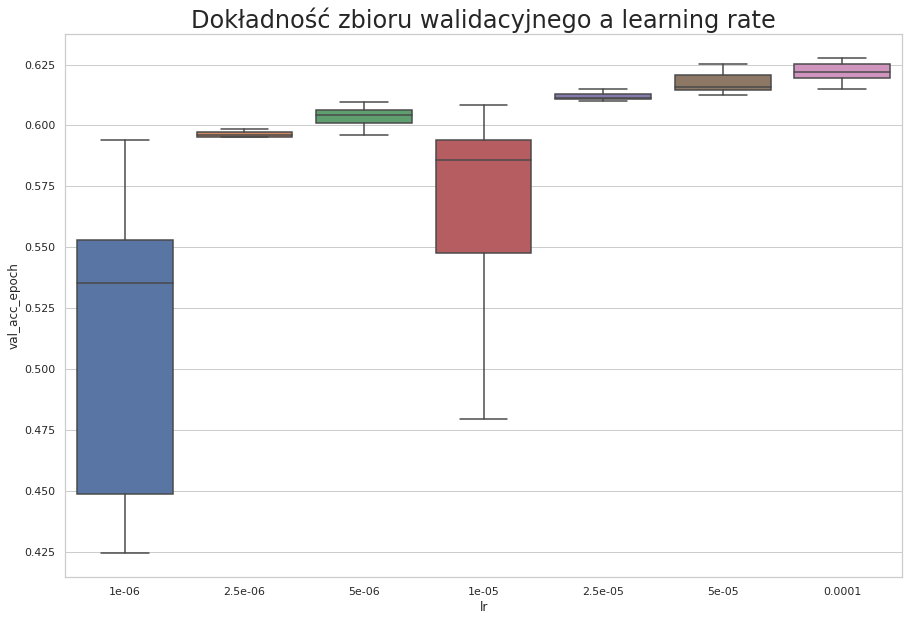

In [75]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="lr", y="val_acc_epoch", data=df)
plt.title('Dokładność zbioru walidacyjnego a learning rate', fontdict={'fontsize':24})

In [64]:
df[df.Name=='vague-sweep-6'].val_acc_epoch

10    0.625852
Name: val_acc_epoch, dtype: float64

<ipython-input-76-fda954b471f5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.boxplot(x="lr", y="val_acc_epoch", data=df[df.lr!=1e-6][df.lr!=1e-5])


Text(0.5, 1.0, 'Dokładność zbioru walidacyjnego a learning rate')

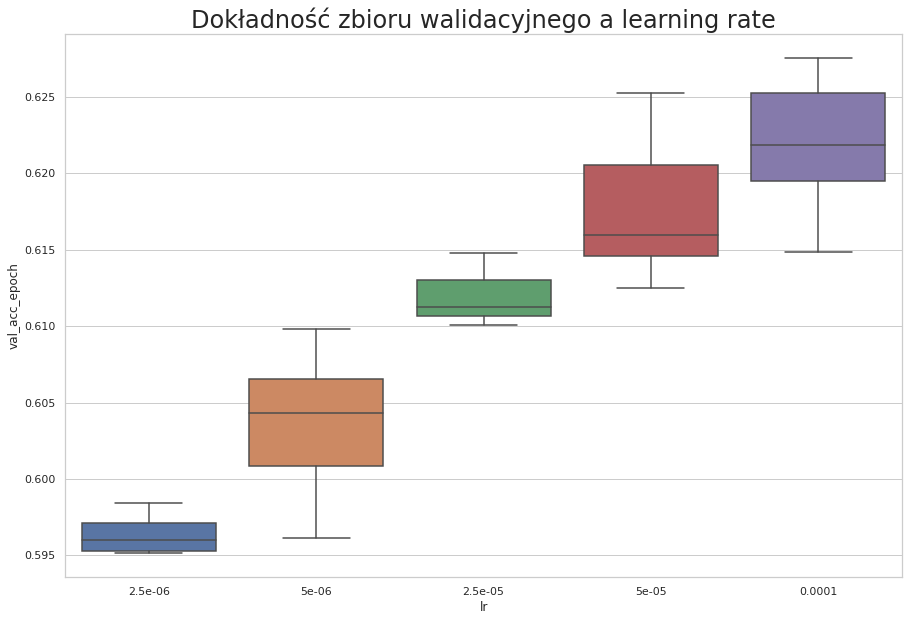

In [76]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="lr", y="val_acc_epoch", data=df[df.lr!=1e-6][df.lr!=1e-5])
plt.title('Dokładność zbioru walidacyjnego a learning rate', fontdict={'fontsize':24})

In [48]:
df.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'batch_norm', 'batch_size', 'dropout', 'lr', 'negative_slope', 'epoch',
       'train_acc_batch', 'train_acc_epoch', 'train_loss_agr_epoch',
       'train_loss_batch', 'train_loss_con_epoch', 'train_loss_epoch',
       'train_loss_ext_epoch', 'train_loss_neu_epoch', 'train_loss_ope_epoch',
       'trainer/global_step', 'val_acc_epoch', 'val_loss_agr_epoch',
       'val_loss_all_epoch', 'val_loss_con_epoch', 'val_loss_epoch',
       'val_loss_ext_epoch', 'val_loss_neu_epoch', 'val_loss_ope_epoch'],
      dtype='object')

Text(0.5, 1.0, 'Dokładność zbioru walidacyjnego a LeakyReLU')

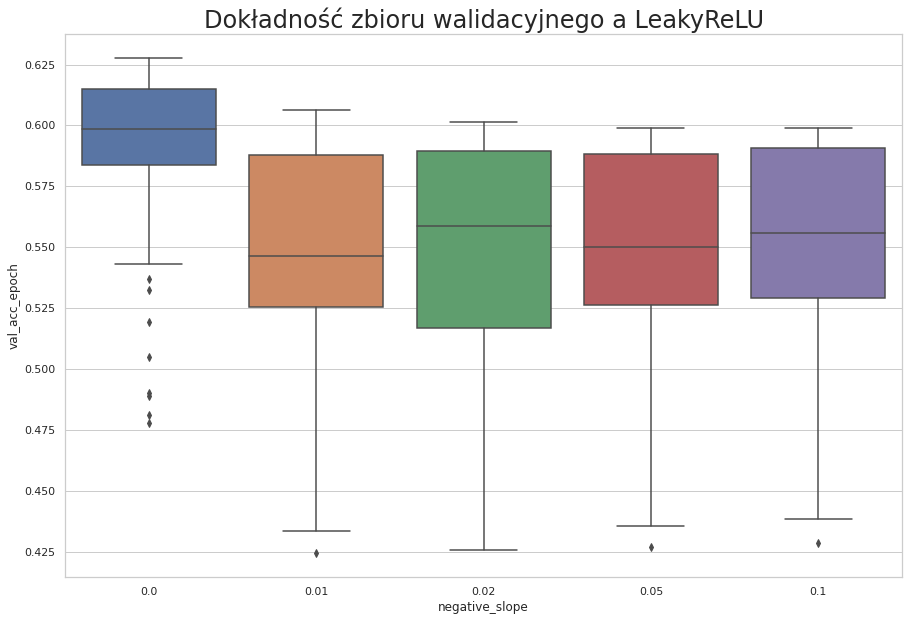

In [77]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="negative_slope", y="val_acc_epoch", data=df)
plt.title('Dokładność zbioru walidacyjnego a LeakyReLU', fontdict={'fontsize':24})

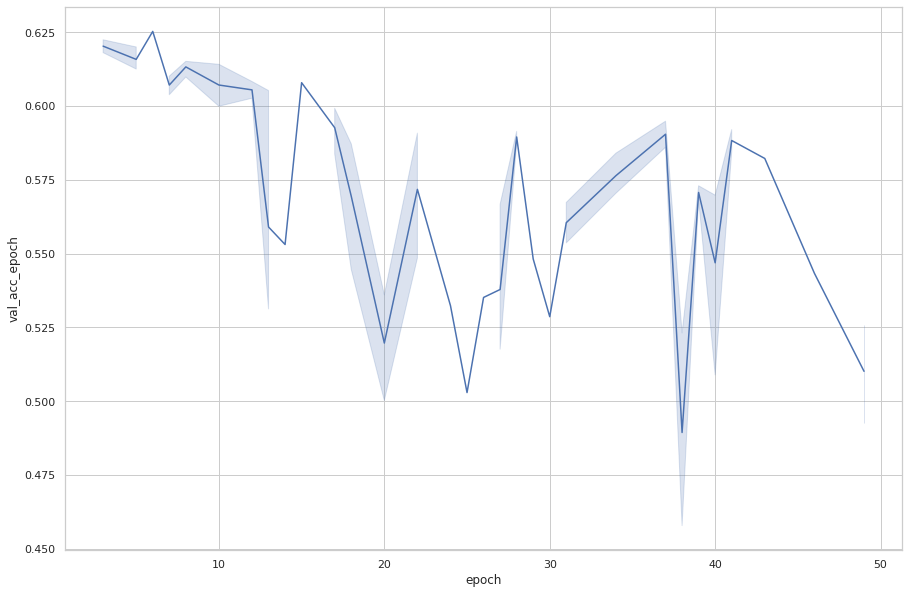

In [58]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="epoch", y="val_acc_epoch", data=df)